In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
from opmap.RawCam import RawCam
from opmap.VmemMap import VmemMap
from opmap.PhaseMap import PhaseMap
from opmap.PhaseVarianceMap import PhaseVarianceMap
from opmap.util import makeMovie

# 2D array test

In [3]:
folder_name = '20170625-1'
output_name = '20170625'

In [4]:
vmem = RawCam(path='/mnt/recordings/SimulationResults/%s/' % folder_name, cam_type='numpy', image_width=200, image_height=200, frame_start=0, frame_end=-1)

In [5]:
vmem_temp = VmemMap(vmem)

In [6]:
vmem.cmap = vmem_temp.cmap

In [7]:
vmem.saveImage('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/%s/%s' % (output_name, folder_name))

In [8]:
import subprocess

In [9]:
subprocess.call('ffmpeg -r 30 -y -i "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/{0}/{1}/%06d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/{0}/{1}/movie.mp4"'.format(output_name, folder_name), shell=True)

0

# batch run

In [134]:
import subprocess
output_name = '20170703'
folder_names = ['20170628-11']

In [ ]:
for folder_name in folder_names:
    print(folder_name)
    vmem = RawCam(path='/mnt/recordings/SimulationResults/%s/' % folder_name, cam_type='numpy', image_width=200, image_height=200, frame_start=0, frame_end=-1)
    vmem_temp = VmemMap(vmem)
    vmem.cmap = vmem_temp.cmap
    vmem.saveImage('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/%s/%s' % (output_name, folder_name))
    subprocess.call('ffmpeg -r 30 -y -i "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/{0}/{1}/%06d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/{0}/{1}/movie.mp4"'.format(output_name, folder_name), shell=True)

20170628-11


# check temperature array

In [3]:
temp  = np.load('/mnt/recordings/SimulationResults/20170705-1/cell_0000/temp.npy')

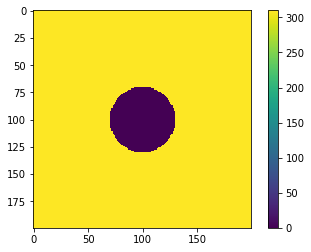

In [4]:
plt.imshow(temp)
plt.colorbar()
plt.show()

# ion channel reaction

In [86]:
ca_i = np.zeros([800, 200, 200])
for i in range(800):
    num = "{0:04d}".format(i+1)
    ca_i[i, :, :] = np.load('/mnt/recordings/SimulationResults/20170628-10/cell_%s/cai.npy' % num)
vmem = RawCam(path='/mnt/recordings/SimulationResults/20170628-10/', cam_type='numpy', image_width=200, image_height=200, frame_start=0, frame_end=-1)
vmem_temp = VmemMap(vmem)
vmem.cmap = vmem_temp.cmap

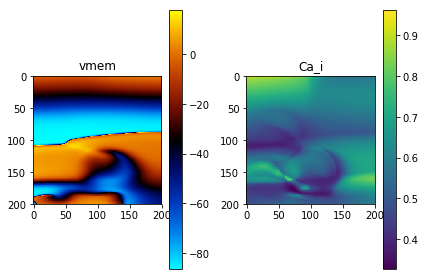

In [95]:
time = 450
plt.subplot(1,2,1)
plt.imshow(vmem.data[time, :, :], cmap=vmem.cmap)
plt.title('vmem')
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(ca_i[time, :, :])
plt.title('Ca_i')
plt.colorbar()
plt.tight_layout()

# 統合出力

In [126]:
import subprocess
output_name = '20170703'
folder_name = '20170628-4'

In [127]:
vmem1 = RawCam(path='/mnt/recordings/SimulationResults/20170628-4/', cam_type='numpy', image_width=200, image_height=200, frame_start=0, frame_end=-1)
vmem2 = RawCam(path='/mnt/recordings/SimulationResults/20170630-1/', cam_type='numpy', image_width=200, image_height=200, frame_start=0, frame_end=-1)
vmem1.data = np.vstack((vmem1.data, vmem2.data))
vmem_temp = VmemMap(vmem1)
vmem1.cmap = vmem_temp.cmap
vmem1.saveImage('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/%s/%s' % (output_name, folder_name))
subprocess.call('ffmpeg -r 30 -y -i "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/{0}/{1}/%06d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/{0}/{1}/movie.mp4"'.format(output_name, folder_name), shell=True)

0